## EDA on EnviroScreen 4 data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#### Read in #4 EnviroScreen

In [42]:
enviro4 = pd.read_excel('../../raw_data/calenviroscreen40resultsdatadictionary_F_2021.xlsx')

In [5]:
enviro4.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       ' CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Lead', 'Lead Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl'

In [6]:
enviro4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

### Convert enviro4 from xlsx to csv

In [43]:
enviro4.to_csv('Enviro4.csv')

In [44]:
enviro4.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.183570,100.000000,95-100% (highest scores),...,79.374746,76.0,98.919598,12.8,93.831338,30.3,91.039290,93.155109,9.663213,99.722642
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.653790,99.987393,95-100% (highest scores),...,95.533902,73.2,98.391960,19.8,99.206143,31.2,92.281369,93.165408,9.664281,99.735250
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.393909,99.974786,95-100% (highest scores),...,81.553661,62.6,93.391960,6.4,61.530453,20.3,63.967047,83.751814,8.687785,95.789208
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.327940,99.962179,95-100% (highest scores),...,78.711598,65.7,95.351759,15.7,97.345133,35.4,96.413181,94.641227,9.817371,99.886536
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.745476,99.949571,95-100% (highest scores),...,86.561104,72.7,98.304020,13.7,95.288912,32.7,94.157161,95.398873,9.895964,99.949571


#### Asthma Vs. Ozone

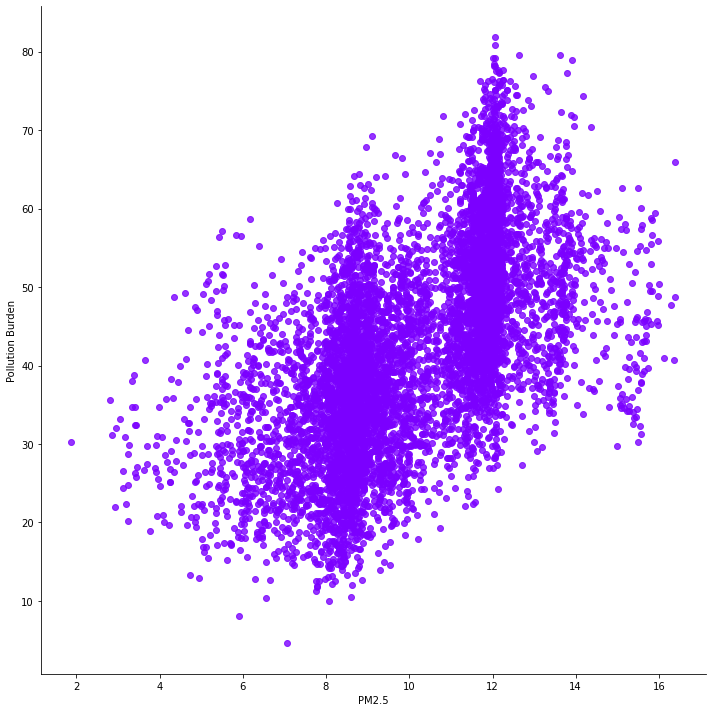

In [63]:
sns.lmplot(x='PM2.5', y='Pollution Burden',data=enviro4, fit_reg=False, height=10)

Intuitively, it makes sense the pollution metric PM2.5 would trend positively with the Pollution burden overall

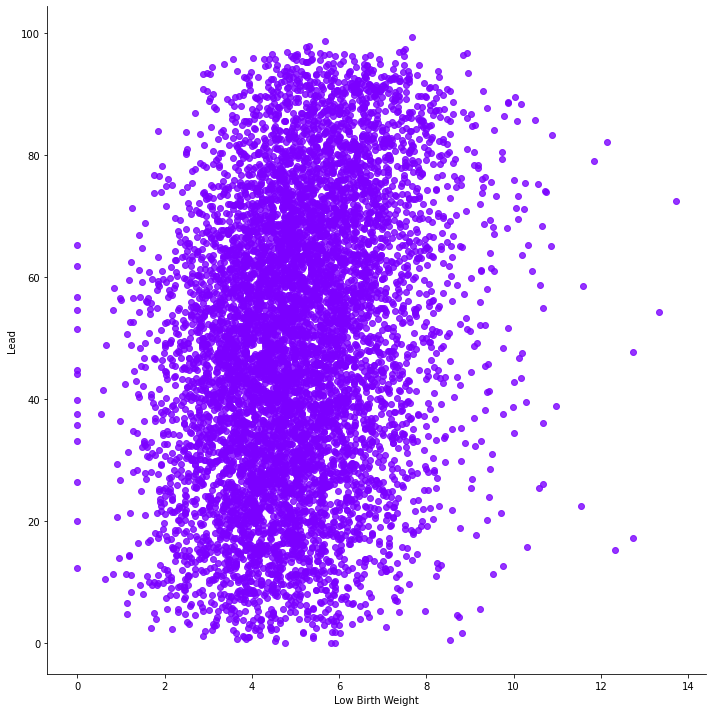

In [65]:
sns.lmplot(x='Low Birth Weight', y='Lead',data=enviro4, fit_reg=False, height=10)

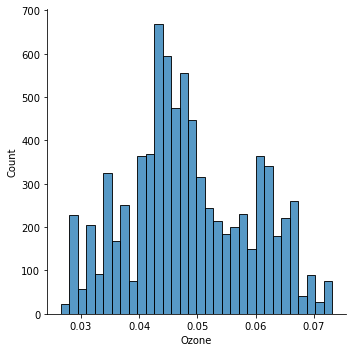

In [20]:
sns.displot(data = enviro4, x = 'Ozone')
plt.show()

Ozone parts per million variate mildly, however most are between .04 and .05

#### Avg asthma cases per 10000 in population of county

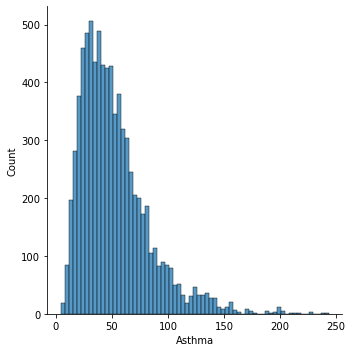

In [21]:
sns.displot(data = enviro4, x = 'Asthma')
plt.show()

Most asthma cases are between 20 to 70 per 10000 people in the population.

#### TO DO: try and scale this for use, too much data. 

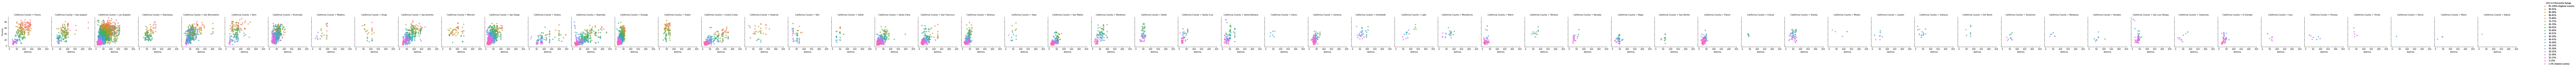

In [24]:
#g = sns.FacetGrid(data = enviro4, col="California County", hue="CES 4.0 Percentile Range")
g.map(plt.scatter, "Asthma", "Poverty", alpha=.6)
g.add_legend()
plt.show()

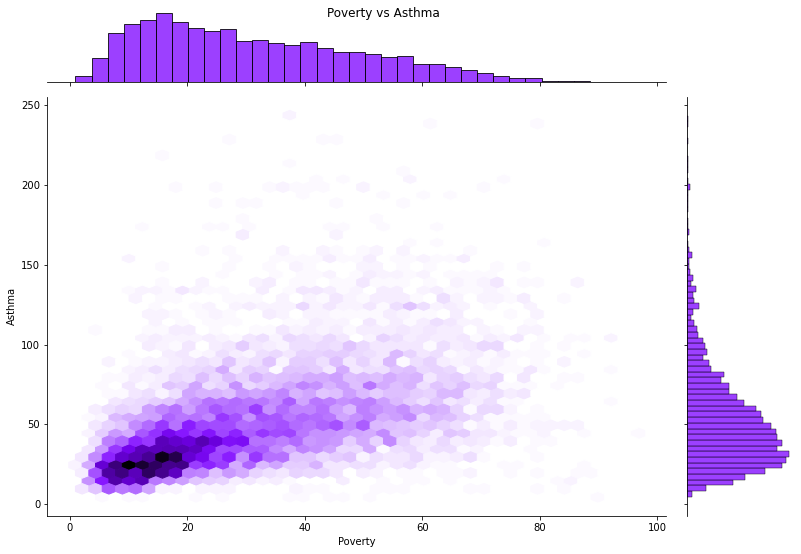

In [75]:
sns.set_palette("gist_rainbow_r")
sns.jointplot(x="Poverty", y="Asthma", kind="hex",data=enviro4)
plt.suptitle('Poverty vs Asthma')
plt.gcf().set_size_inches(12,8)
g.set_axis_labels("Percent under poverty line", "Average cases of athsma per 10000 people")
plt.show()

Asthma cases and poverty hace a postive trend, you can spot the density of the trend in the bottom left and as the poverty increase so do the cases of asthma. 

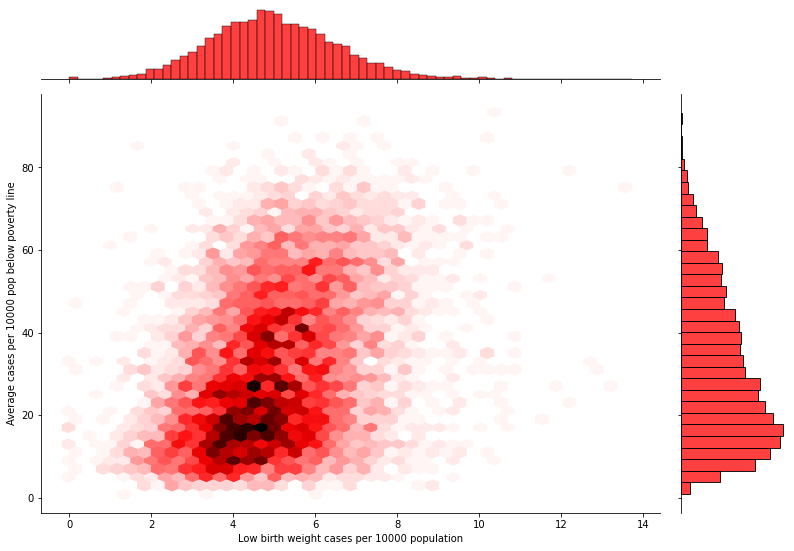

In [73]:
g = sns.jointplot(x="Low Birth Weight", y="Poverty", data=enviro4, kind="hex", color="r")
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="X")
g.set_axis_labels("Low birth weight cases per 10000 population", "Average cases per 10000 pop below poverty line")
plt.gcf().set_size_inches(12,8)
plt.show()

There is less of a positive trend between Low birth weight and Poverty, however it is still reletively present.

### Reducing features dramatically to analyze closer. There is a ton of data to visualize. 

In [46]:
enviro4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [ ]:
feat_cols = enviro4[['Ozone', 
                     'Pollution Burden', 'Asthma', 'Low Birth Weight','Education', 'Poverty']]

#### These facet grids cannot handle the amount of data right now. 

In [71]:
# g = sns.FacetGrid(data = feat_cols, col="Asthma")
# g.map(plt.scatter, "Pollution Burden", "Education", alpha=.6)
# g.add_legend()
# plt.show()

In [61]:
# g.map(plt.scatter, "Pollution Burden", "Education", alpha=.6)
# g.add_legend()
# plt.show()

In [62]:
# g = sns.FacetGrid(data = feat_cols, col="Asthma", hue="Ozone")

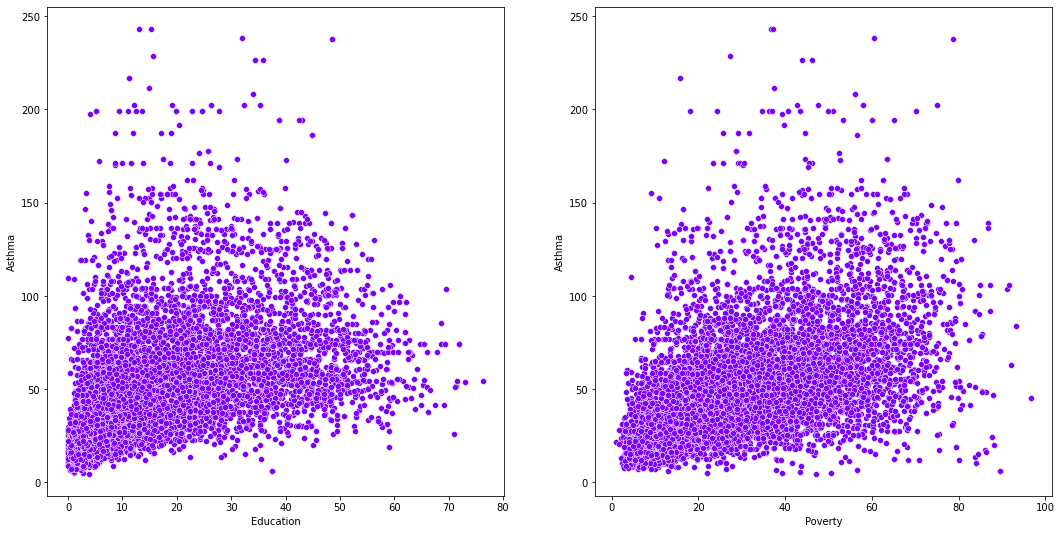

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18, 9))

x = 'Asthma'
y = 'Education'
y2 = 'Poverty'
sns.scatterplot(data = feat_cols, 
        x = y, y = x, 
        ax = ax[0]);

sns.scatterplot(data = feat_cols, 
        x = y2, y = x, 
        ax = ax[1]);

It is nice to visualize how the health effect of asthma is impacted with Education vs. Poverty in CA.

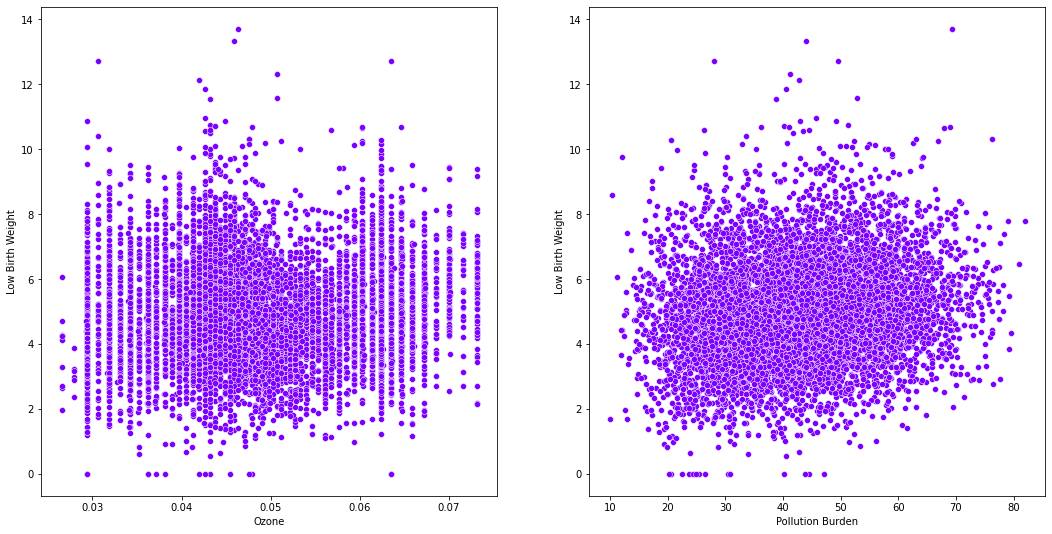

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18, 9))

x = 'Low Birth Weight'
y = 'Ozone'
y2 = 'Pollution Burden'
sns.scatterplot(data = feat_cols, 
        x = y, y = x, 
        ax = ax[0]);

sns.scatterplot(data = feat_cols, 
        x = y2, y = x, 
        ax = ax[1]);

#### ^ Ozone data is much more striated than other catagories